# Create a copy on datalab notebook

This notebook is based on the example provide by MOCpy's creators found here:
https://cds-astro.github.io/mocpy/_collections/notebooks/filtering_astropy_table.html (MOCPy v0.14.0)
    
As of 7/8/24, I realized that the example changed. This is because they updated their website, 
so a modified version of this example can be found here:
https://cds-astro.github.io/mocpy/_collections/notebooks/filtering_astropy_table.html (MOCPy v0.15.0)

In [1]:
!pip install ipyaladin mocpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import astropy.units as u
from astropy.visualization.wcsaxes.frame import EllipticalFrame
import matplotlib.pyplot as plt
#from astroquery.vizier import Vizier
from astropy.wcs import WCS
from mocpy import MOC
from astropy.table import Table

In [3]:
pwd

'/home/jail/dlusers/bmerino95'

In [4]:
#file = 'delve_dr2.csv'
#file = 'delve_dr2_5000.csv'
#file = 'delve_dr2_25_2501.csv'
#file = 'smash_to_moc.csv'
file = 'des_dr2.csv'
cat = Table.read(file,format='ascii')
print('Length of catalog: %s'%len(cat))
cat[0:5]['ra','dec'].show_in_notebook()
#cat[0:5].show_in_notebook()

Length of catalog: 10000


idx,ra,dec
0,20.085517,-41.144963
1,24.493862,-38.087796
2,3.549714,-34.952615
3,30.131408,-40.624364
4,33.649025,-32.789299


In [11]:
#nest4096 and ring256 keep track of the healpixels
#cat.keys()

In [5]:
#Provide MOC.from_longlat with ra and dec in degrees
#max_norder:The depth of the smallest HEALPix cells contained in the MOC.

m1 = MOC.from_lonlat(
    cat["ra"].T * u.deg,
    cat["dec"].T * u.deg,
    max_norder=5,
)

In [6]:
def plot(moc, title=""):
    fig = plt.figure(figsize=(15, 10))

    wcs = WCS(naxis=2)
    wcs.wcs.ctype = ["GLON-AIT", "GLAT-AIT"] #Hammer-Aitoff projection
    wcs.wcs.crval = [110.0, 0.0]             #Specify the value of the reference pixel
    wcs.wcs.cdelt = [-0.675, 0.675]
    wcs.wcs.crpix = [240.5, 120.5]

    ax = fig.add_subplot(1, 1, 1, projection=wcs, frame_class=EllipticalFrame)

    moc.fill(
        ax=ax,
        wcs=wcs,
        edgecolor="r",
        facecolor="r",
        linewidth=1.0,
        fill=True,
        alpha=0.5,
    )
    moc.border(ax=ax, wcs=wcs, color="black", alpha=1)

    plt.xlabel("ra")
    plt.ylabel("dec")
    if title:
        plt.title(title)
    plt.grid(color="black", linestyle="dotted")
    plt.show()
    plt.close()

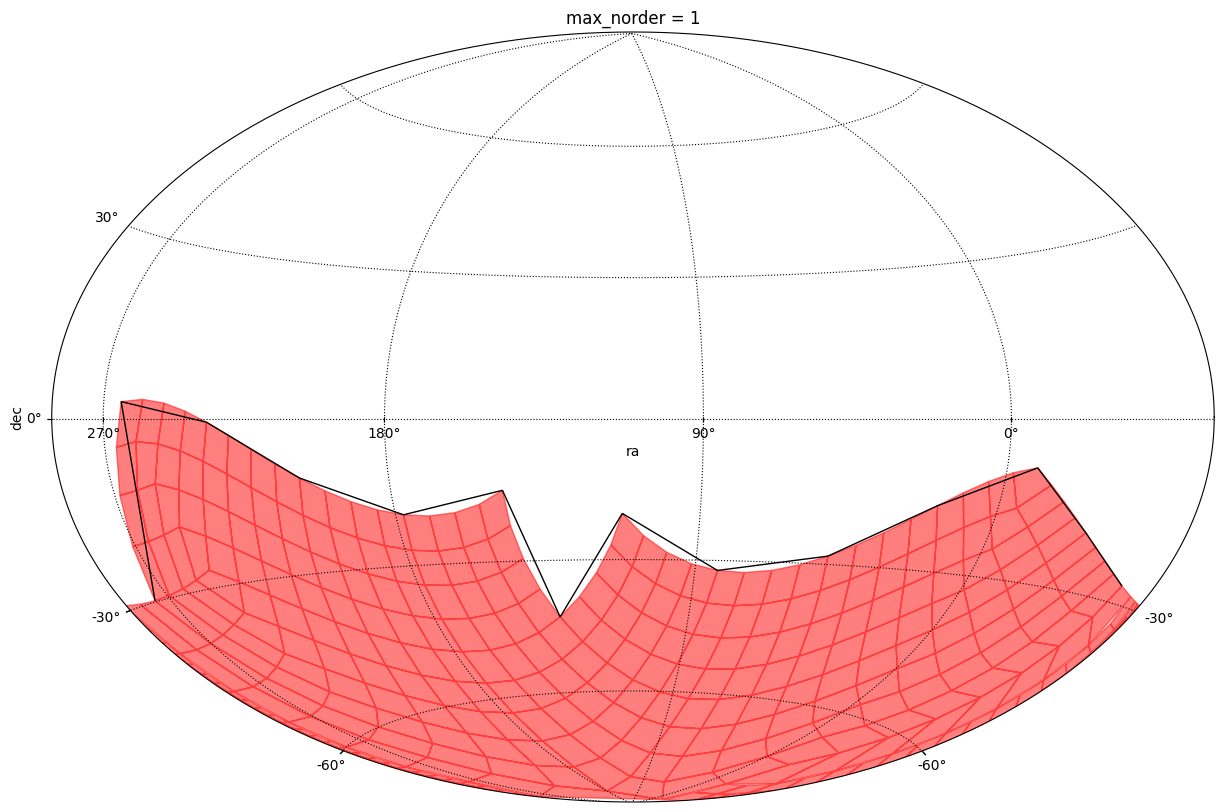

In [7]:
m1 = MOC.from_lonlat(
    cat["ra"].T * u.deg,
    cat["dec"].T * u.deg,
    max_norder=1,
)
plot(moc=m1, title="max_norder = 1")

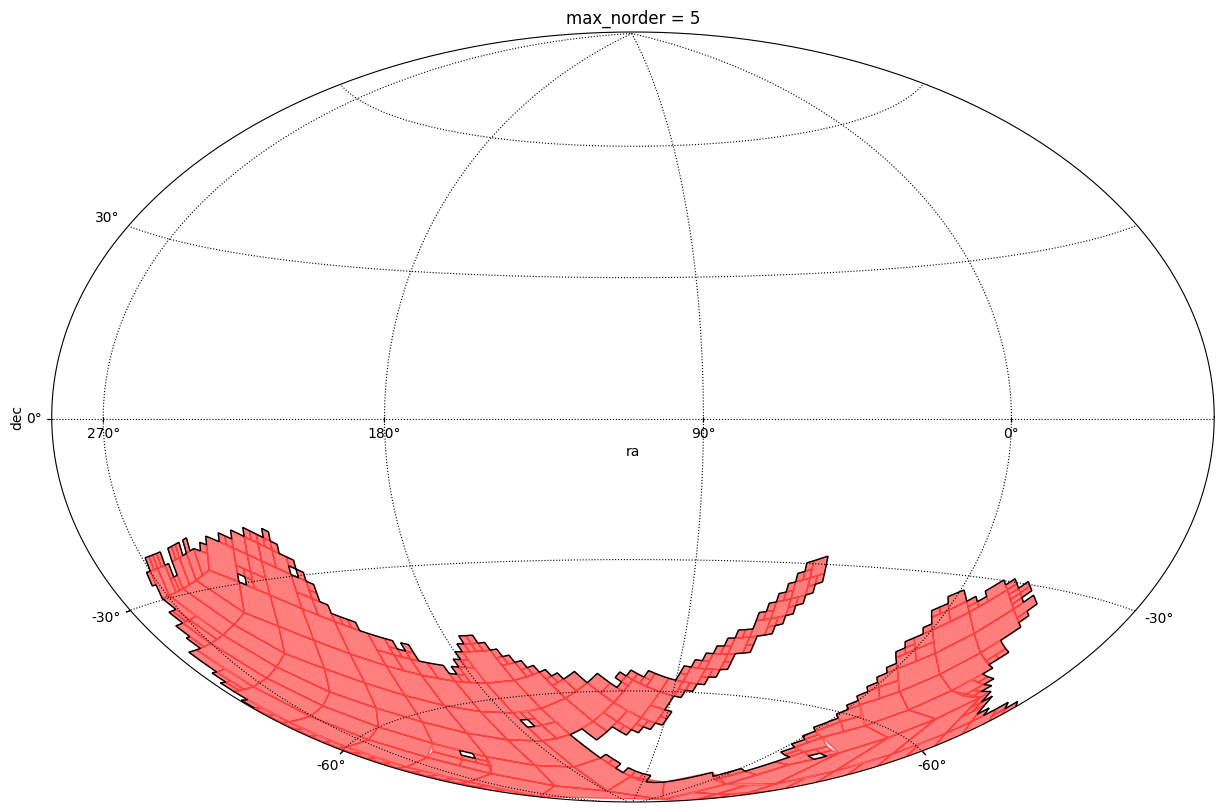

In [8]:
m1 = MOC.from_lonlat(
    cat["ra"].T * u.deg,
    cat["dec"].T * u.deg,
    max_norder=5,
)
plot(moc=m1, title="max_norder = 5")

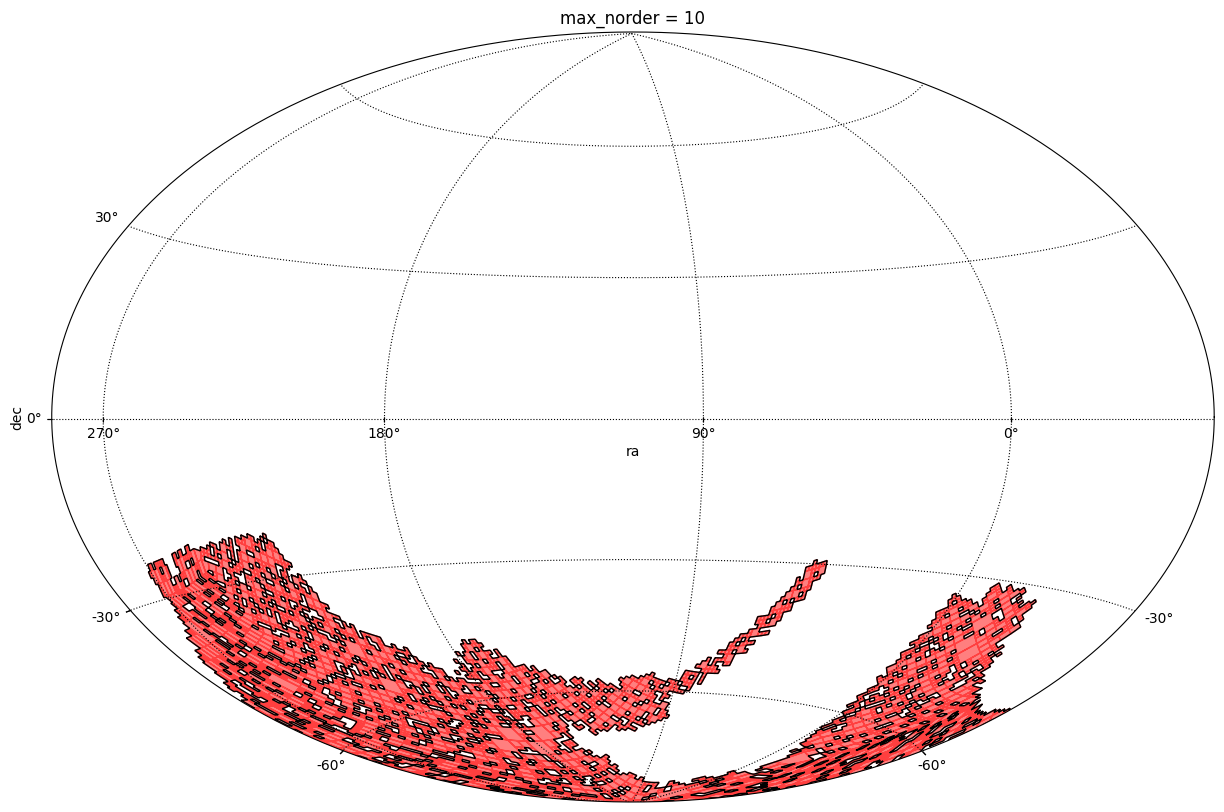

In [9]:
m1 = MOC.from_lonlat(
    cat["ra"].T * u.deg,
    cat["dec"].T * u.deg,
    max_norder=10,
)
plot(moc=m1, title="max_norder = 10")

# Edit the cell below

# If you would like to save the MOC to use elsewhere, uncomment the lines below to save them to your working directory. 

In [ ]:
#m1.save('/Users/brian.merino/aladin_test_2/delve_dr2_pt_1_test_2.fits',format='fits',overwrite=False)
#m1.save('/Users/brian.merino/aladin_test_2/smash_moc.fits',format='fits',overwrite=False)
#m1.save('/Users/brian.merino/aladin_test_2/des_dr2_moc.fits',format='fits',overwrite=False)

# Display MOC in Aladin viewer

In [10]:
from ipyaladin import Aladin

from mocpy import MOC
import astropy.units as u

In [11]:
aladin = Aladin(fov=2)
aladin

/data0/sw/anaconda3/lib/python3.10/site-packages/ipywidgets/widgets/widget.py:687: DeprecationWarning: Deprecated in traitlets 4.1, use the instance .metadata dictionary directly, like x.metadata[key] or x.metadata.get(key, default)
  if trait.get_metadata('sync'):


Aladin(fov=2.0, init_options=['background_color', 'coo_frame', 'fov', 'full_screen', 'grid_color', 'grid_opaci…

In [12]:
aladin.add_moc(m1, color='red', name='des_dr2', opacity=0.4)

# Display the individual points